In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Contents**

- [Matrix factorization methods](#1.-Matrix-factorization-methods)
- [Incorporating User and item biases](#2.-Incorporating-user-and-item-biases)

## 1. Matrix factorization methods

In [43]:
def matrix_factorization(R, k, learning_rate, n_epochs):
    m, n = R.shape
    
    # number of nonzero ratings
    n_zero_ratings = np.sum(~np.isnan(R))
    
    # initialization
    U = np.random.randn(m,k)
    V = np.random.randn(n,k)
    
    mean_error = np.zeros(n_epochs)
    
    # gradient descent steps
    for i in range(n_epochs):
        
        # error matrix
        E = R-U.dot(V.T)
        E[np.isnan(E)]=0

        # update U and V
        new_U = U + learning_rate*E.dot(V)
        new_V = V + learning_rate*E.T.dot(U)

        U = new_U
        V = new_V
        
        # compute mean_error
        error_squared = np.sum(E**2)
        mean_error[i] = np.sqrt(error_squared/(n_zero_ratings))
        
    return U, V, mean_error

**Simple example**

In [44]:
R = np.array([
    [2, np.nan, 3, np.nan],
    [np.nan, 5, np.nan, 4],
    [1, 3, np.nan, 5],
    [np.nan, 4, 2, np.nan]
])
R

array([[ 2., nan,  3., nan],
       [nan,  5., nan,  4.],
       [ 1.,  3., nan,  5.],
       [nan,  4.,  2., nan]])

In [45]:
U, V, mean_error = matrix_factorization(R, 
                                        k = 2,
                                        learning_rate = 0.05,
                                        n_epochs = 50)

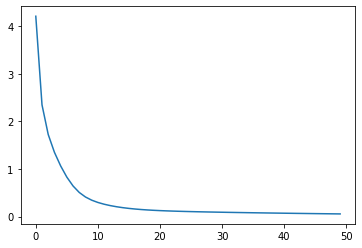

In [46]:
plt.plot(mean_error)

In [47]:
R

array([[ 2., nan,  3., nan],
       [nan,  5., nan,  4.],
       [ 1.,  3., nan,  5.],
       [nan,  4.,  2., nan]])

In [48]:
# approximation of R
U.dot(V.T).round(2)

array([[1.91, 4.96, 3.03, 7.06],
       [1.99, 5.  , 0.19, 4.  ],
       [1.13, 2.97, 2.52, 4.99],
       [1.56, 4.02, 1.97, 5.19]])

**MoviLens dataset example**

In [49]:
ratings = pd.read_csv('ratings_large.csv')
ratings.head()

,userId,movieId,rating,timestamp,title
0,4,1,4.0,1113765937,Toy Story (1995)
1,4,2,4.0,1113767306,Jumanji (1995)
2,4,5,2.0,1123990453,Father of the Bride Part II (1995)
3,4,6,4.5,1113767242,Heat (1995)
4,4,10,4.0,1113765995,GoldenEye (1995)


In [50]:
# ratings matrix
ratings_matrix = ratings.pivot('title','userId')['rating']
ratings_matrix

userId,4,19,42,43,51,55,56,71,73,79,...,283153,283164,283165,283170,283183,283184,283185,283195,283204,283224
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.5,4.5,NaN,...,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,4.0,...,3.0,NaN,4.5,NaN,NaN,NaN,NaN,2.5,NaN,NaN
101 Dalmatians (1996),NaN,NaN,4.0,NaN,NaN,NaN,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,NaN,NaN,NaN,NaN,3.5,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.5,NaN,NaN
12 Angry Men (1957),1.5,5.0,NaN,4.5,5.0,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,...,3.0,NaN,NaN,NaN,NaN,2.0,NaN,3.5,NaN,NaN
Zootopia (2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
# load Javier's fake user (or your fake user, if you created one)
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/fake_user.csv'
user = pd.read_csv(url, index_col='title', squeeze=True)
user

title
(500) Days of Summer (2009)                              NaN
10 Things I Hate About You (1999)                        NaN
101 Dalmatians (1996)                                    NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961)   NaN
12 Angry Men (1957)                                      NaN
                                                          ..
Zoolander (2001)                                         NaN
Zootopia (2016)                                          NaN
eXistenZ (1999)                                          NaN
xXx (2002)                                               NaN
¡Three Amigos! (1986)                                    NaN
Name: rating, Length: 1344, dtype: float64

In [52]:
# add fake user to the ratings matrix
ratings_matrix['user'] = user
ratings_matrix

userId,4,19,42,43,51,55,56,71,73,79,...,283164,283165,283170,283183,283184,283185,283195,283204,283224,user
title,,,,,,,,,,,,,,,,,,,,,
(500) Days of Summer (2009),NaN,NaN,4.0,NaN,NaN,NaN,NaN,2.5,4.5,NaN,...,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN
10 Things I Hate About You (1999),NaN,NaN,NaN,NaN,NaN,1.5,NaN,NaN,NaN,4.0,...,NaN,4.5,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,4.0,NaN,NaN,NaN,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (One Hundred and One Dalmatians) (1961),NaN,NaN,NaN,NaN,NaN,3.5,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,4.5,NaN,NaN,NaN
12 Angry Men (1957),1.5,5.0,NaN,4.5,5.0,NaN,4.0,NaN,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoolander (2001),NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,2.5,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,3.5,NaN,NaN,NaN
Zootopia (2016),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
R = ratings_matrix.to_numpy()

In [60]:
U, V, mean_error = matrix_factorization(R, 
                                        k = 50, 
                                        learning_rate = .00005, 
                                        n_epochs = 100)

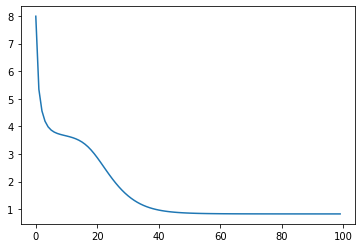

In [61]:
plt.plot(mean_error)

In [62]:
# predictions
R_pred = U.dot(V.T)
user_pred = pd.Series(R_pred[:,-1], index=user.index) 
user_pred

title
(500) Days of Summer (2009)                               2.783281
10 Things I Hate About You (1999)                         2.691786
101 Dalmatians (1996)                                     2.280164
101 Dalmatians (One Hundred and One Dalmatians) (1961)    2.694817
12 Angry Men (1957)                                       3.370075
                                                            ...   
Zoolander (2001)                                          2.456401
Zootopia (2016)                                           2.925350
eXistenZ (1999)                                           2.624529
xXx (2002)                                                2.212907
¡Three Amigos! (1986)                                     2.455570
Length: 1344, dtype: float64

In [63]:
# top 20 predictions
user_pred[user.isna()].sort_values(ascending=False).head(20)

title
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                                  3.510492
Third Man, The (1949)                                                          3.456236
Ran (1985)                                                                     3.436578
Lives of Others, The (Das leben der Anderen) (2006)                            3.432998
All About My Mother (Todo sobre mi madre) (1999)                               3.425580
Modern Times (1936)                                                            3.422410
Notorious (1946)                                                               3.396866
Double Indemnity (1944)                                                        3.392835
Big Sleep, The (1946)                                                          3.387077
12 Angry Men (1957)                                                            3.370075
Citizen Kane (1941)                                                            3.362450
Rear Window (1954)        

In [64]:
# bottom 20 predictions
user_pred[user.isna()].sort_values().head(20)

title
Barb Wire (1996)                                1.364108
Super Mario Bros. (1993)                        1.413546
Speed 2: Cruise Control (1997)                  1.442244
RoboCop 3 (1993)                                1.466381
I Still Know What You Did Last Summer (1998)    1.508670
Honey, I Blew Up the Kid (1992)                 1.566484
Anaconda (1997)                                 1.652366
Striptease (1996)                               1.707083
Flintstones, The (1994)                         1.708032
Batman & Robin (1997)                           1.708484
Beverly Hillbillies, The (1993)                 1.735773
Scary Movie 2 (2001)                            1.769742
Richie Rich (1994)                              1.774627
Bio-Dome (1996)                                 1.796898
Wild Wild West (1999)                           1.803309
Haunting, The (1999)                            1.815757
Superman III (1983)                             1.818201
Sliver (1993)            

## 2. Incorporating user and item biases

In [65]:
def matrix_factorization(R, k, learning_rate, n_epochs):
    m, n = R.shape
    
    # number of nonzero ratings
    n_zero_ratings = np.sum(~np.isnan(R))
    
    # initialization
    U = np.random.randn(m,k+2)
    U[:,k+1] = 1 # set (k+2)th column to 1
    V = np.random.randn(n,k+2)
    V[:,k] = 1 # set (k+1)th column to 1
    
    mean_error = np.zeros(n_epochs)
    
    # gradient descent steps
    for i in range(n_epochs):
        
        # error matrix
        E = R-U.dot(V.T)
        E[np.isnan(E)]=0

        # update U and V
        new_U = U + learning_rate*E.dot(V)
        new_U[:,k+1] = 1 # restore column of ones
        new_V = V + learning_rate*E.T.dot(U)
        new_V[:,k] = 1 # # restore column of ones

        U = new_U
        V = new_V
        
        # compute mean_error
        error_squared = np.sum(E**2)
        mean_error[i] = np.sqrt(error_squared/(n_zero_ratings))
        
    return U, V, mean_error

**MovieLens dataset example**

In [66]:
U, V, mean_error = matrix_factorization(R, 
                                        k = 50, 
                                        learning_rate = .00005, 
                                        n_epochs = 100)

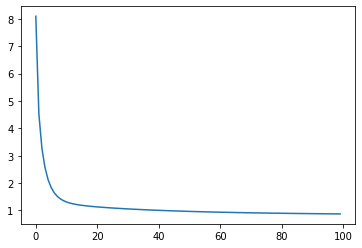

In [67]:
plt.plot(mean_error)

In [68]:
# predictions
R_pred = U.dot(V.T)
user_pred = pd.Series(R_pred[:,-1], index=user.index) # 

In [69]:
# top 20 predictions
user_pred[user.isna()].sort_values(ascending=False).head(20)

title
Touch of Evil (1958)                                                           4.210750
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)                                  4.206063
Double Indemnity (1944)                                                        4.182705
Notorious (1946)                                                               4.095773
Rashomon (Rashômon) (1950)                                                     4.093902
North by Northwest (1959)                                                      4.088208
Third Man, The (1949)                                                          4.069563
Maltese Falcon, The (1941)                                                     4.059238
Big Sleep, The (1946)                                                          4.044202
Three Colors: Red (Trois couleurs: Rouge) (1994)                               4.034781
Ran (1985)                                                                     4.031211
Chinatown (1974)          

In [40]:
# bottom 20 predictions
user_pred[user.isna()].sort_values().head(20)

title
Milk Money (1994)                               1.001641
Barb Wire (1996)                                1.088400
Up Close and Personal (1996)                    1.099071
Honey, I Blew Up the Kid (1992)                 1.157587
Bio-Dome (1996)                                 1.226353
Beverly Hillbillies, The (1993)                 1.303934
Speed 2: Cruise Control (1997)                  1.316372
Super Mario Bros. (1993)                        1.360166
RoboCop 3 (1993)                                1.427944
I Still Know What You Did Last Summer (1998)    1.451473
Striptease (1996)                               1.483316
Haunting, The (1999)                            1.494918
Anaconda (1997)                                 1.496204
Batman & Robin (1997)                           1.550396
Richie Rich (1994)                              1.553093
Flintstones, The (1994)                         1.586926
Scary Movie 2 (2001)                            1.588980
Sliver (1993)            

In [41]:
# what is my user bias
V[-1,-1]

-0.5026235529717138